 #### Let's import the necessary libraries


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the dataset with read_csv

In [4]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)

#### let's generate a head to visualize the structure of the dataset

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


We can see a dataset that organizes countries by rows and the cases registered day by day by columns, thus obtaining 1147 columns with the record on 03/09/2023.

#### Let's organize the dataset for a better analysis.

* We need to delete "province/state", "Lat" and "Long" columns
* Let's transpose the dataset to see the data in a organized way, it's necessary to set the first column as index

In [6]:
df = df.drop(["Province/State", "Lat", "Long"], axis=1)

df = df.set_index("Country/Region").transpose()
df.index = pd.to_datetime(df.index, format='%m/%d/%y')

#### Now let's generate a tail to see the transformed dataset, this time we visualize the last values. With this we understand that the datset shows the accumulated positive cases per day.

In [7]:
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2023-03-05,209390,334427,271477,47875,105277,11,9106,10044125,446819,232619,...,1034303,251071,12014,552051,11526966,703228,535,11945,343135,264127
2023-03-06,209406,334427,271477,47875,105277,11,9106,10044957,446819,232619,...,1034303,251071,12014,552125,11526966,703228,535,11945,343135,264127
2023-03-07,209436,334427,271490,47875,105277,11,9106,10044957,446819,232619,...,1034303,251071,12014,552157,11526986,703228,535,11945,343135,264127
2023-03-08,209451,334443,271494,47890,105288,11,9106,10044957,447308,232619,...,1034303,251247,12014,552157,11526994,703228,535,11945,343135,264276
2023-03-09,209451,334457,271496,47890,105288,11,9106,10044957,447308,232974,...,1034303,251247,12014,552162,11526994,703228,535,11945,343135,264276


#### Understanding the organization of the data we can generate a total of cases only with the tail function to get the last row.

In [8]:
acumulado_casos = df.tail(1)
acumulado_casos = acumulado_casos.transpose().sort_values(by='2023-03-09', ascending=False)
print(acumulado_casos.head(10))
print(acumulado_casos.tail(10))

                2023-03-09
Country/Region            
US               103802702
India             44690738
France            38618509
Germany           38249060
Brazil            37076053
Japan             33320438
Korea, South      30615522
Italy             25603510
United Kingdom    24425309
Russia            22075858
                      2023-03-09
Country/Region                  
Winter Olympics 2022         535
Holy See                      29
Canada                        13
Canada                        13
Antarctica                    11
MS Zaandam                     9
United Kingdom                 4
Korea, North                   1
Canada                         0
United Kingdom                 0


#### Now we need to organize our data to fix the problems that we saw in the print

* When performing the head and tail of the dataset we see that there are some repeated countries.
* We are going to use the groupby function to not add the repeated data and have unique entries per country.
* We need to repeat the sort_values function, this is because when grouping the data they return to the initial alphabetical order.

In [9]:
acumulado_casos2 = acumulado_casos.groupby("Country/Region").sum()
acumulado_casos2 = acumulado_casos2.sort_values(by='2023-03-09', ascending=False)

#### To conclude the exploratory analysis, we will obtain and graph the countries with the highest number of case presentations.

In [10]:
acumulado_casos_top = acumulado_casos2.head(10)
acumulado_casos_top = acumulado_casos_top.reset_index()
acumulado_casos_top.columns = ['Country/Region', 'Total_Cases']
acumulado_casos_top

,Country/Region,Total_Cases
0,US,103802702
1,India,44690738
2,France,39866718
3,Germany,38249060
4,Brazil,37076053
5,Japan,33320438
6,"Korea, South",30615522
7,Italy,25603510
8,United Kingdom,24658705
9,Russia,22075858


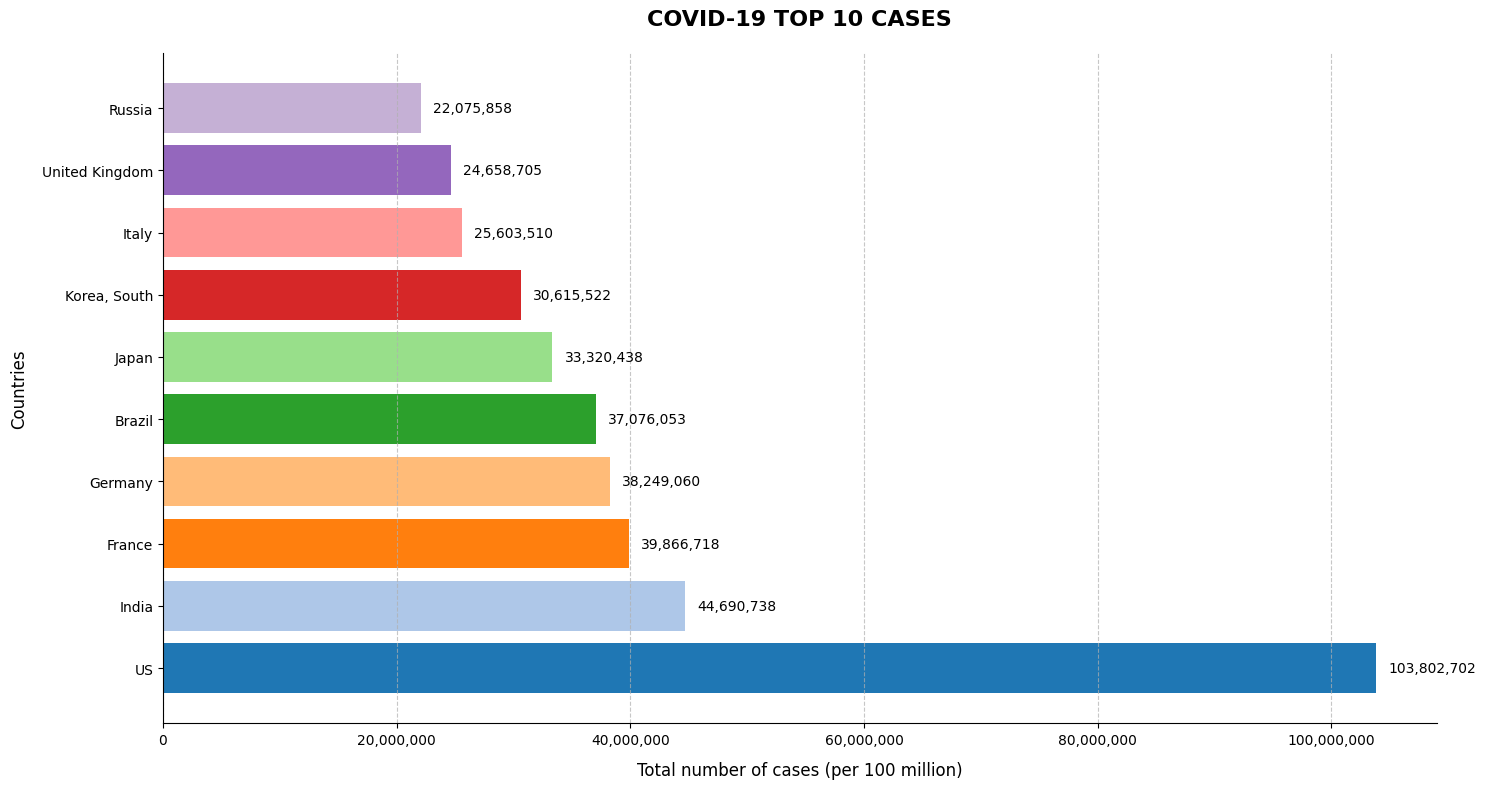

In [11]:
plt.figure(figsize=(15, 8))

ax = plt.barh(acumulado_casos_top['Country/Region'], acumulado_casos_top['Total_Cases'], color=plt.cm.tab20.colors, height=0.8)

for i, v in enumerate(acumulado_casos_top['Total_Cases']):
    plt.text(v + max(acumulado_casos_top['Total_Cases'])*0.01, 
             i, 
             f"{v:,.0f}", 
             color='black', 
             ha='left', 
             va='center',
             fontsize=10)

plt.title('COVID-19 TOP 10 CASES', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Total number of cases (per 100 million)', fontsize=12, labelpad=10)
plt.ylabel('Countries', fontsize=12, labelpad=10)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))

plt.grid(axis='x', linestyle='--', alpha=0.7)

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()

plt.show()

#### As of today, the United States and India have the highest accumulated number of positive COVID-19 cases registered.

## In which month did the highest number of infections occur?

#### As we saw before, the dataset presents the accumulated cases. We need to use the diff function to calculate the new cases per day.
#### Now the dasaset "df_daily" contains the amount of positive cases day by day, so with the groupby function, we can group the dates by month.

In [12]:
df_daily = df.diff()
df_daily.tail() 

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2023-03-05,21.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,56.0,0.0
2023-03-06,16.0,0.0,0.0,0.0,0.0,0.0,0.0,832.0,0.0,0.0,...,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-07,30.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,20.0,0.0,0.0,0.0,0.0,0.0
2023-03-08,15.0,16.0,4.0,15.0,11.0,0.0,0.0,0.0,489.0,0.0,...,0.0,176.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,149.0
2023-03-09,0.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,355.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_monthly = df_daily.groupby([df.index.year, df.index.month]).agg('sum')
df_monthly.tail(10)

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  Antarctica  \
2022 6               2181.0   4750.0    203.0    880.0  1559.0         0.0   
     7               3221.0  31246.0   1367.0   1734.0   981.0         0.0   
     8               7501.0  17255.0   2850.0    519.0   335.0         0.0   
     9               5938.0   2869.0    369.0    200.0   495.0         0.0   
     10              3875.0    745.0    165.0    308.0     0.0         0.0   
     11              2844.0    377.0    252.0    684.0  1545.0         0.0   
     12              1652.0    463.0    138.0    532.0   419.0         0.0   
2023 1                986.0    361.0    150.0     88.0    89.0         0.0   
     2                777.0    224.0     63.0     27.0    71.0         0.0   
     3                129.0     66.0     55.0     24.0    33.0         0.0   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  ...  \
2022 6                        388.0   136599.0    280.0    26091.0  ...   
     7                        132.0   193135.0   2122.0    32631.0  ...   
     8                        201.0   117918.0   9033.0    11280.0  ...   
     9                        124.0    30195.0   8477.0     3015.0  ...   
     10                         8.0    10455.0   2367.0     2743.0  ...   
     11                         0.0     8372.0    495.0      919.0  ...   
     12                         0.0   163892.0    239.0    15488.0  ...   
2023 1                          0.0   145996.0     32.0     5918.0  ...   
     2                          0.0     6990.0    811.0     1198.0  ...   
     3                          0.0      832.0    489.0      956.0  ...   

Country/Region  Uruguay  Uzbekistan  Vanuatu  Venezuela   Vietnam  \
2022 6          31852.0      1736.0   2178.0     2368.0   27091.0   
     7          12174.0      2329.0    458.0     9814.0   33162.0   
     8           9357.0       708.0     91.0     6672.0  632047.0   
     9           6262.0       417.0    135.0     2295.0   67677.0   
     10          5138.0       430.0     31.0     1096.0   23529.0   
     11          3315.0      1872.0      0.0     1497.0   13023.0   
     12         18113.0      2697.0     32.0     3126.0    9323.0   
2023 1          20722.0      1350.0      1.0     1065.0    1266.0   
     2           1593.0       365.0      0.0      394.0     420.0   
     3              0.0       315.0      0.0      181.0      77.0   

Country/Region  West Bank and Gaza  Winter Olympics 2022  Yemen  Zambia  \
2022 6                      2148.0                   0.0    2.0  4078.0   
     7                     22243.0                   0.0   53.0  3626.0   
     8                     20236.0                   0.0   49.0  3339.0   
     9                       436.0                   0.0    9.0   709.0   
     10                      268.0                   0.0    4.0   150.0   
     11                        0.0                   0.0    6.0    65.0   
     12                      192.0                   0.0    0.0   679.0   
2023 1                         0.0                   0.0    0.0  6338.0   
     2                         0.0                   0.0    0.0  2249.0   
     3                         0.0                   0.0    0.0   123.0   

Country/Region  Zimbabwe  
2022 6            3188.0  
     7             792.0  
     8             348.0  
     9             739.0  
     10            428.0  
     11           1271.0  
     12            817.0  
2023 1            1625.0  
     2            2315.0  
     3             355.0  

[10 rows x 289 columns]

Vamos a crear una columna totalizando los casos por mes, agregamos un tail para viasualizar la estructura de los datos

In [14]:
df_monthly['total_casos'] = df_monthly.sum(axis=1)
df_monthly.tail(5)

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  Antarctica  \
2022 11              2844.0    377.0    252.0    684.0  1545.0         0.0   
     12              1652.0    463.0    138.0    532.0   419.0         0.0   
2023 1                986.0    361.0    150.0     88.0    89.0         0.0   
     2                777.0    224.0     63.0     27.0    71.0         0.0   
     3                129.0     66.0     55.0     24.0    33.0         0.0   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  ...  \
2022 11                         0.0     8372.0    495.0      919.0  ...   
     12                         0.0   163892.0    239.0    15488.0  ...   
2023 1                          0.0   145996.0     32.0     5918.0  ...   
     2                          0.0     6990.0    811.0     1198.0  ...   
     3                          0.0      832.0    489.0      956.0  ...   

Country/Region  Uzbekistan  Vanuatu  Venezuela  Vietnam  West Bank and Gaza  \
2022 11             1872.0      0.0     1497.0  13023.0                 0.0   
     12             2697.0     32.0     3126.0   9323.0               192.0   
2023 1              1350.0      1.0     1065.0   1266.0                 0.0   
     2               365.0      0.0      394.0    420.0                 0.0   
     3               315.0      0.0      181.0     77.0                 0.0   

Country/Region  Winter Olympics 2022  Yemen  Zambia  Zimbabwe  total_casos  
2022 11                          0.0    6.0    65.0    1271.0   12388536.0  
     12                          0.0    0.0   679.0     817.0   17219669.0  
2023 1                           0.0    0.0  6338.0    1625.0   10270797.0  
     2                           0.0    0.0  2249.0    2315.0    4587649.0  
     3                           0.0    0.0   123.0     355.0    1247911.0  

[5 rows x 290 columns]

Vamos a crear un dataset mostrando los casos positivos/mes a nivel mundial

In [15]:
df_1 = df_monthly
df_1 = df_1.reset_index()
df_1['mes/año'] = df_1['level_0'].astype(str) + "-" + df_1['level_1'].astype(str).str.zfill(2)

df_casos_mes = df_1[['mes/año', 'total_casos']]

df_casos_mes.tail()

Country/Region,mes/año,total_casos
34,2022-11,12388536.0
35,2022-12,17219669.0
36,2023-01,10270797.0
37,2023-02,4587649.0
38,2023-03,1247911.0


Generamos un grafico sencillo para mostrar en general el mes con mas reportes. vemos como claramente los meses con mas casos son: 1ro 2022-01, 2do 2022-02, 3ro 2022-03.

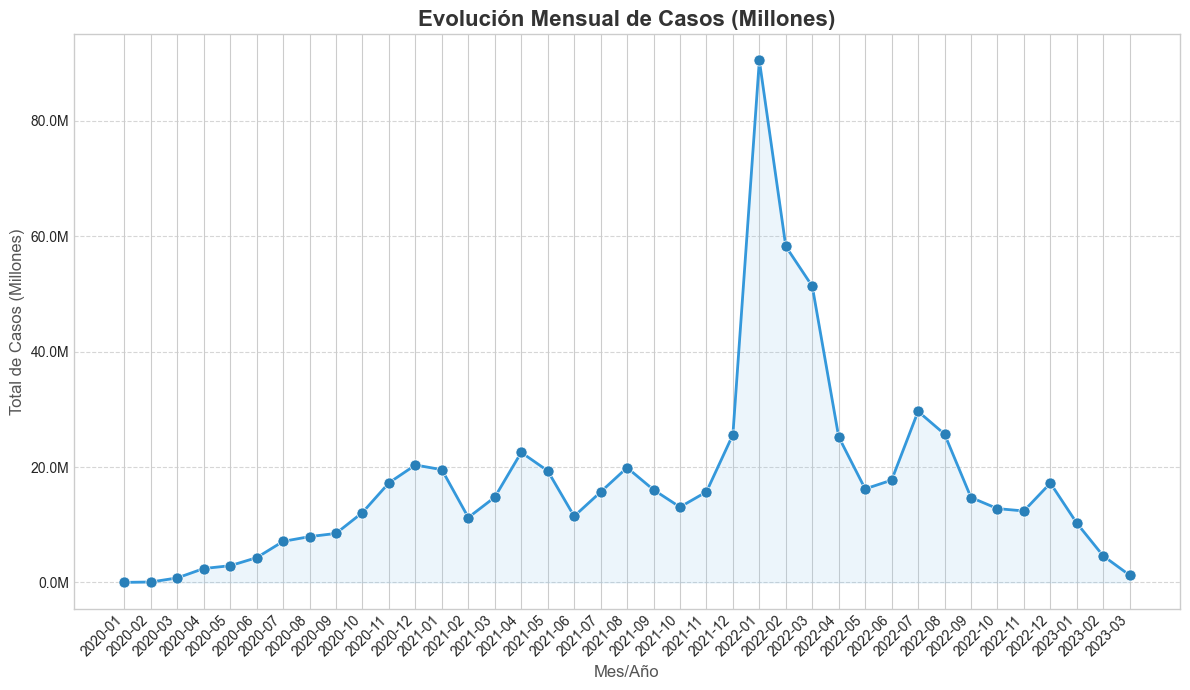

In [16]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 7))

plt.plot(df_casos_mes['mes/año'], df_casos_mes['total_casos'], marker='o', linestyle='-', linewidth=2, markersize=8, color='#3498db', markerfacecolor='#2980b9', markeredgewidth=0.5, markeredgecolor='white')

plt.title('Evolución Mensual de Casos (Millones)', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Mes/Año', fontsize=12, color='#555555')
plt.ylabel('Total de Casos (Millones)', fontsize=12, color='#555555')

def millones(x, pos):
    return f'{x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(millones))

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.fill_between(df_casos_mes['mes/año'], df_casos_mes['total_casos'], alpha=0.15, color='#85c1e9')

plt.tight_layout()

plt.show()

Con la funcion sort_values organizamos de mayor a menor y mostramos los meses con mas alta presentacion de casos

In [17]:
casos_mes_top = df_casos_mes.sort_values(by='total_casos', ascending=False)
casos_mes_top.head(3)

Country/Region,mes/año,total_casos
24,2022-01,90483564.0
25,2022-02,58251972.0
26,2022-03,51347034.0


Exactamente el mes de Enero del 2022 es el mes con mas reportes de covid a nivel mundial. Se presentó un total de 90'483.564 casos nuevos en el mes.

## ¿En ese mismo mes, cuál fue el país que reportó más contagios?

Ya sabemos por el ejercicio anterior que el mes Enero/22 corresponde a la fila 24, con esto podemos filtrar de forma mas sencilla

In [18]:
df_monthly2 = df_daily.groupby([df.index.year, df.index.month]).agg('sum')
df_2022_01 = df_monthly2.reset_index()
df_2022_01 = df_2022_01.iloc[[24]].transpose()
df_2022_01.head()

,24
Country/Region,
level_0,2022.0
level_1,1.0
Afghanistan,4842.0
Albania,48319.0
Algeria,33685.0


Ahora vamos a organizar los datos y filtramos los top 10 para visualizar mejor en el grafico. eliminamos los valores country y level que sobran por los trabajos con indice.

In [19]:
df_enero22 = df_2022_01.iloc[2:].reset_index()
df_enero22.columns = ['Pais', 'Casos']
df_enero22 = df_enero22.sort_values(by='Casos', ascending=False)
df_enero22_top = df_enero22.head(10)
df_enero22_top

,Pais,Casos
260,US,20336435.0
131,France,8951273.0
148,India,6607920.0
154,Italy,4857433.0
278,United Kingdom,4378007.0
241,Spain,3666508.0
31,Brazil,3171691.0
7,Argentina,2724248.0
135,Germany,2706351.0
258,Turkey,2137332.0


Ya tenemos la informacion de que US (20'336.435) fue el pais que presento mas casos en el mes que tuvo mas casos a nivel mundial (Enero/22), sin embargo, vamos a generar un grafico para hacer la comparacion entre los 10 mas altos.

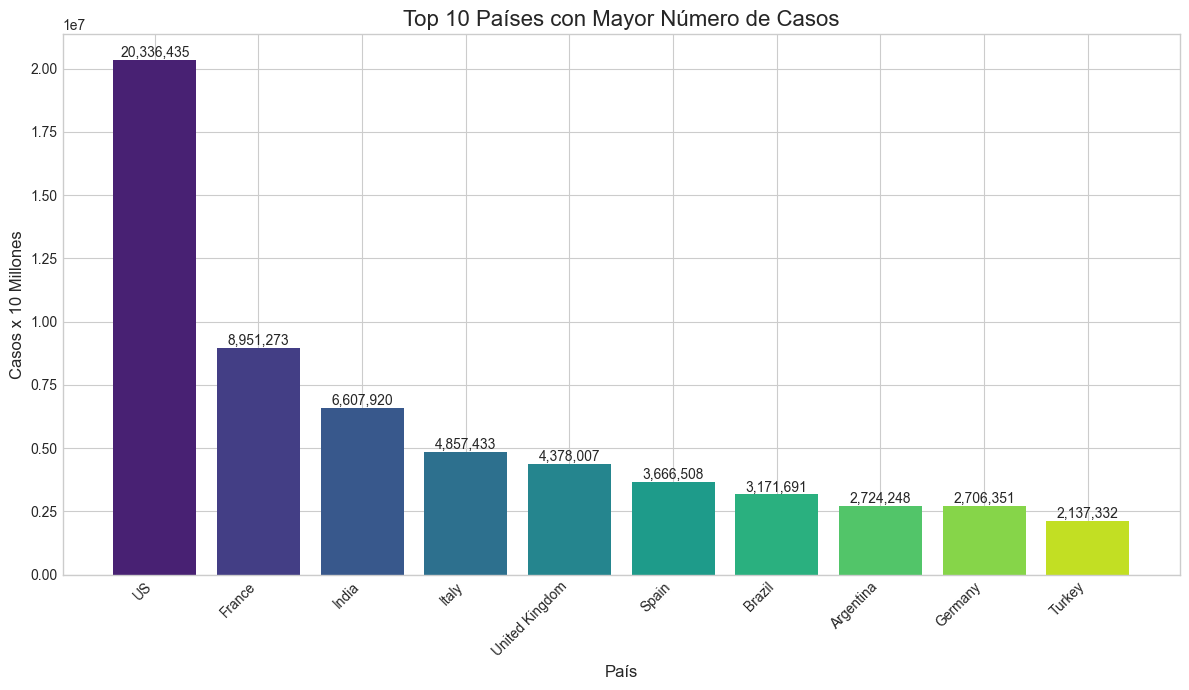

In [20]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 7))

colors = sns.color_palette('viridis', len(df_enero22_top['Pais']))

plt.bar(df_enero22_top['Pais'], df_enero22_top['Casos'], color=colors)

plt.xlabel('País', fontsize=12)
plt.ylabel('Casos x 10 Millones', fontsize=12)
plt.title('Top 10 Países con Mayor Número de Casos', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10)

for i, v in enumerate(df_enero22_top['Casos']):
    plt.text(i, v + 50, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## ¿Cuál es el país con el menor número de casos reportados hasta la fecha?

Aprovechando el subset 'acumulado_casos' generado en el analisis exploratorio, ya contamos con los casos acumulados hasta la fecha, ahora vamos a trabajar con la funcion tail para traer los paises con el menor numero de casos

In [21]:
acumulado_casos_bottom = acumulado_casos2.tail(10)
acumulado_casos_bottom = acumulado_casos_bottom.sort_values(by='2023-03-09', ascending=True)
acumulado_casos_bottom

,2023-03-09
Country/Region,
"Korea, North",1
MS Zaandam,9
Antarctica,11
Holy See,29
Winter Olympics 2022,535
Diamond Princess,712
Summer Olympics 2020,865
Tuvalu,2805
Kiribati,5014


Vemos que hasta la fecha Korea del norte ha reportado unicamente un caso de COVID-19. Esto probablemente se deba a temas de gobierno, ya que posibles casos de COVID en Korea del norte eran reportados como casos de fiebre. El dataset inicial nos muestra los casos reportados oficialmente, probablemente la coyuntura politica y el aislamiento de korea del norte muestren una cifra alejada de la realidad.

Vamos a generar un grafico mostrando los 10 paises con menos casos reportados para tener un panorama mas claro. vale la pena recalcar que se generaron las entradas "Summer Olympics 2020 " y "Winter Olympics 2022" para registrar los casos que se presentaron durante el evento de las olimpiadas, esto se hace con el fin de hacer un analisis epidemiologico detallado en los participantes y asistentes del evento, ya que puede generar problemas de propragacion del virus debido a su naturaleza de participacion internacional.

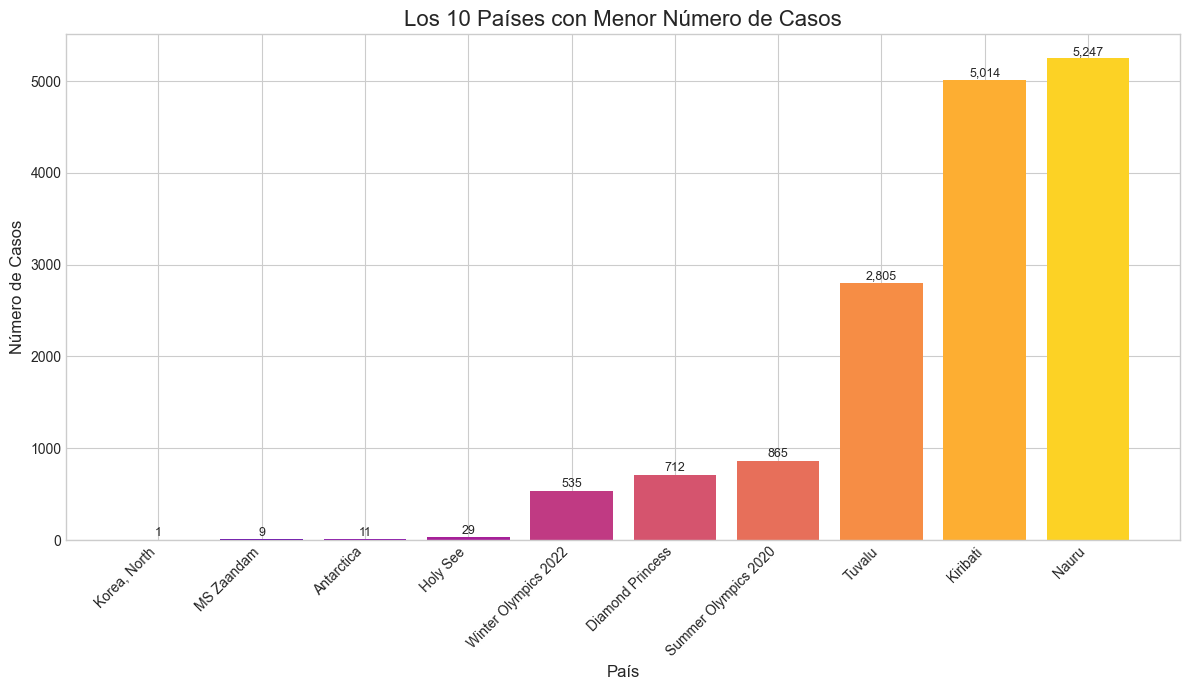

In [22]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 7))

colors = sns.color_palette('plasma', len(acumulado_casos_bottom.index))

plt.bar(acumulado_casos_bottom.index, acumulado_casos_bottom['2023-03-09'], color=colors)

plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.title('Los 10 Países con Menor Número de Casos', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for i, v in enumerate(acumulado_casos_bottom['2023-03-09']):
    plt.text(i, v + 5, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Como fue la evolucion de los contagios en los 3 paises con mayor numero de casos reportados

Y habiamos trabajado los paises top en presentacion de casos en nuestro analisis exploratorio. revisando de nuevo el casos_top encontramos a US, India y francia como los 3 paises con mas casos reportados.

In [23]:
acumulado_casos_top

,Country/Region,Total_Cases
0,US,103802702
1,India,44690738
2,France,39866718
3,Germany,38249060
4,Brazil,37076053
5,Japan,33320438
6,"Korea, South",30615522
7,Italy,25603510
8,United Kingdom,24658705
9,Russia,22075858


In [24]:
df_monthly2 = df_monthly[['US', 'India', 'France']].copy()

df_monthly2 = df_monthly2.T.groupby(level=0).sum().T

df_monthly2 = df_monthly2.reset_index()
df_monthly2['mes/año'] = df_monthly2['level_0'].astype(str) + "-" + df_monthly2['level_1'].astype(str).str.zfill(2)
df_monthly_top3 = df_monthly2[['mes/año', 'US', 'India', 'France']]
df_monthly_top3.tail()

Country/Region,mes/año,US,India,France
34,2022-11,1321555.0,19225.0,1012929.0
35,2022-12,1952012.0,6010.0,1451740.0
36,2023-01,1597537.0,4247.0,230973.0
37,2023-02,1080585.0,3717.0,98014.0
38,2023-03,359247.0,2901.0,39543.0


*Vamos* a convertir las fechas a formato date/time, y setear de nuevo como indice para generar un grafico comparativo con matplotlib.

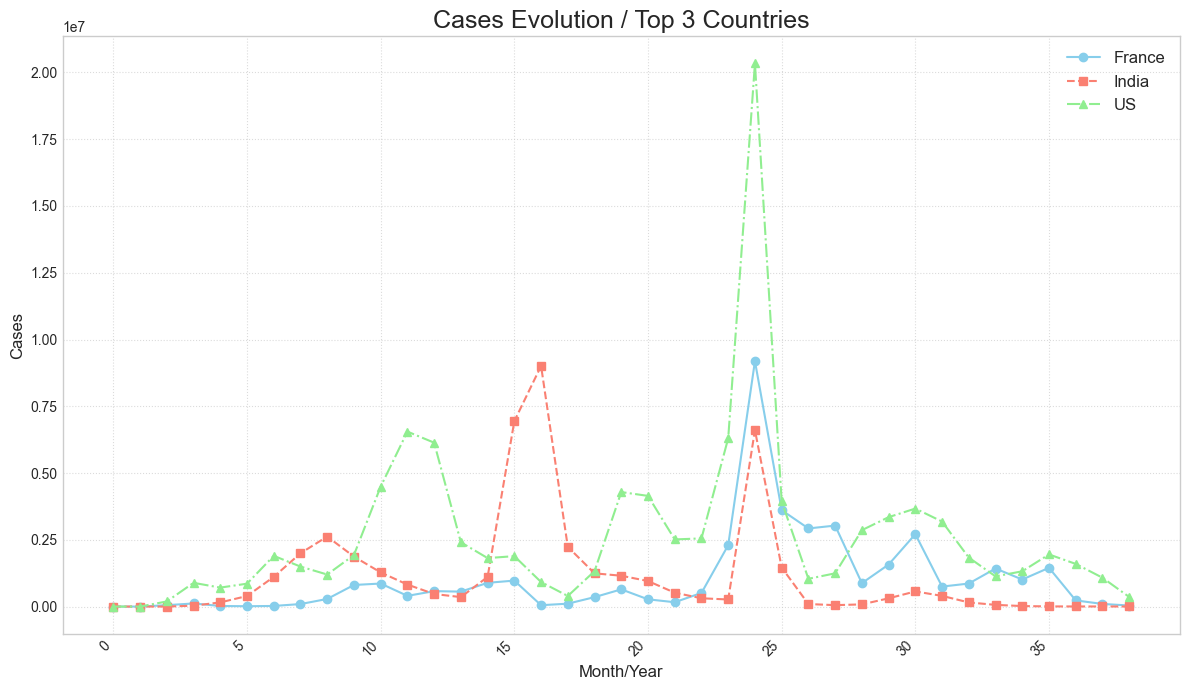

In [25]:
plt.figure(figsize=(12, 7))

plt.plot(df_monthly_top3.index, df_monthly_top3['France'], label='France', marker='o', linestyle='-', color='skyblue')
plt.plot(df_monthly_top3.index, df_monthly_top3['India'], label='India', marker='s', linestyle='--', color='salmon')
plt.plot(df_monthly_top3.index, df_monthly_top3['US'], label='US', marker='^', linestyle='-.', color='lightgreen')

plt.title('Cases Evolution / Top 3 Countries', fontsize=18)
plt.xlabel('Month/Year', fontsize=12)
plt.ylabel('Cases', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Vemos como se destaca la curva de color verde correspondiente a estados unidos sobre las otras. hay un pico importante en mayo-2021 en donde destaca India. y en general, el mes con mayor nivel de contagios a nivel mundial "enero-2021" estos 3 paises generan la misma tendencia de contagios sin importar la diferencia geografica que tienen.

## como fue la evolucion de lños contagios en los principales paises de latinoamerica?

Como ejercicio, vamos a comparar paises de la region como colombia, brasil, argentina, chile y mexico. Vamos a reciclar el dataframe acumulado_casos2 que produjimos en el analisis exploratorio, ahora vamos a transformarlo para mostrar unicamente los paises mencionados y un global para utilizar mas adelante.

In [26]:
casos_latin = acumulado_casos2
casos_latin = casos_latin.reset_index()
casos_latin.columns = ['Country/Region', 'Total_Cases']

nueva_fila = pd.DataFrame([{'Country/Region': 'Total Global', 'Total_Cases': casos_latin['Total_Cases'].sum()}])

casos_latin = pd.concat([casos_latin, nueva_fila], ignore_index=True)

casos_latin = casos_latin[casos_latin['Country/Region'].isin(['Colombia', 'Brazil', 'Argentina', 'Chile', 'Mexico', 'Total Global'])]

poblacion = {'Colombia': 52682689, 'Brazil': 212559417, 'Argentina': 46044703, 'Chile': 19250192, 'Mexico': 126014024, 'Total Global': 8033063480}

casos_latin['Population'] = casos_latin['Country/Region'].map(poblacion)

casos_latin['Cases_vs_Global'] = (casos_latin['Total_Cases'] / casos_latin[casos_latin['Country/Region'] == 'Total Global']['Total_Cases'].values[0]) * 100

casos_latin['Cases_vs_population'] = (casos_latin['Total_Cases'] / casos_latin['Population']) * 100

casos_latin

,Country/Region,Total_Cases,Population,Cases_vs_Global,Cases_vs_population
4,Brazil,37076053,212559417,5.480001,17.442677
14,Argentina,10044957,46044703,1.484688,21.815662
18,Mexico,7483444,126014024,1.106085,5.938580
21,Colombia,6359093,52682689,0.939902,12.070555
26,Chile,5192286,19250192,0.767442,26.972645
201,Total Global,676570149,8033063480,100.000000,8.422318


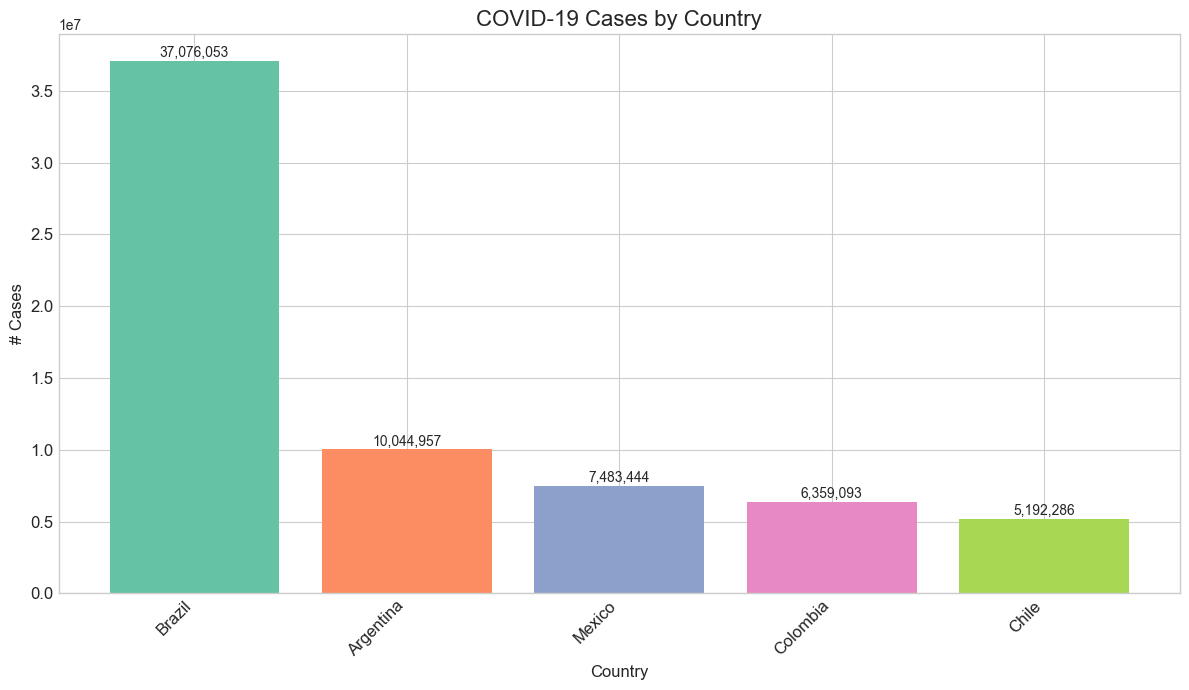

In [27]:
casos_latin_sin_total = casos_latin[casos_latin['Country/Region'] != 'Total Global']

plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 7)) 

colors = sns.color_palette('Set2', len(casos_latin_sin_total['Country/Region']))

plt.bar(casos_latin_sin_total['Country/Region'], casos_latin_sin_total['Total_Cases'], color=colors)

plt.xlabel('Country', fontsize=12)
plt.ylabel('# Cases', fontsize=12)
plt.title('COVID-19 Cases by Country', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(casos_latin_sin_total['Total_Cases']):
    plt.text(i, v + 50000, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#### Ahora vamos a realizar una comparacion mas enfocada, debemos analizar el porcentaje de contagios en la poblacion de cada pais

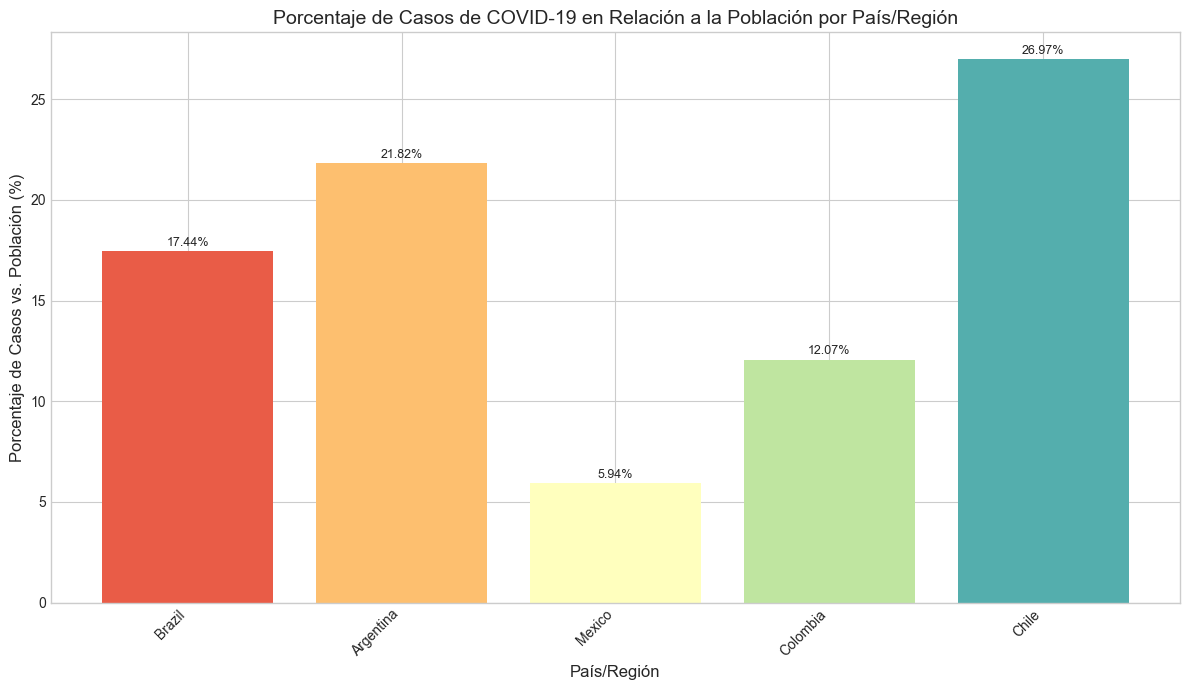

In [28]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 7))

colors = sns.color_palette('Spectral', len(casos_latin_sin_total['Country/Region']))

plt.bar(casos_latin_sin_total['Country/Region'], casos_latin_sin_total['Cases_vs_population'], color=colors)

plt.xlabel('País/Región', fontsize=12)
plt.ylabel('Porcentaje de Casos vs. Población (%)', fontsize=12)
plt.title('Porcentaje de Casos de COVID-19 en Relación a la Población por País/Región', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for i, v in enumerate(casos_latin_sin_total['Cases_vs_population']):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Es interesante ver como cambia la representacion de los paises, ya que no estamos comparando numero de casos positivos, ahora estamos comparando los casos positivos en proporcion a la poblacion de cada pais, con esto vemos como a opesar de acumular un menor numero de casos positivos en chile, al tener una poblacion menor se transforma en el pais mas contagiado por COVID en la lista que seleccionamos.

# Conclusiones

La visualización de datos, como la proporcionada por matplotlib, es fundamental en la Ciencia de Datos porque transforma grandes conjuntos de datos en información comprensible y perceptible. En nuestro caso de estudio sobre COVID-19, los gráficos y las métricas calculadas nos permiten entender rápidamente la magnitud de la pandemia en diferentes países y su impacto en términos de porcentaje de población afectada. En esencia, la visualización de datos convierte números crudos en insights valiosos, facilitando la toma de decisiones informadas.